In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [42]:
df = pd.read_csv('cell_phones_total.csv')
df.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,140k,141k,NaN,NaN,NaN,141k,141k,141k,NaN,NaN
1,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,18.4M,19.7M,21.6M,23.9M,22M,22.6M,22.7M,22.7M,22.8M,23M
2,Angola,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,14.1M,13.9M,13M,13.3M,13.3M,14.8M,14.6M,15.3M,23.7M,25.7M
3,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M,2.62M,2.64M,2.78M,2.61M
4,Andorra,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k,80.4k,93.8k,114k,126k


In [44]:
df_melted = df.melt(id_vars=['country'], var_name='Year', value_name='total_cell_phones')
print(df_melted)

            country  Year total_cell_phones
0             Aruba  1960               0.0
1       Afghanistan  1960               0.0
2            Angola  1960               0.0
3           Albania  1960               0.0
4           Andorra  1960               0.0
...             ...   ...               ...
13691         Samoa  2023               NaN
13692         Yemen  2023               20M
13693  South Africa  2023              108M
13694        Zambia  2023             21.2M
13695      Zimbabwe  2023               15M

[13696 rows x 3 columns]


In [46]:
def clean_cell_value(x):
    if pd.isna(x):
        return None
    # Remove everything except digits, dots, and 'k', 'M' suffixes
    x = str(x).strip().lower().replace(",", "")
    match = re.match(r'^([0-9.]+)([kmb]?)$', x)
    if not match:
        return None
    num, suffix = match.groups()
    num = float(num)
    if suffix == 'k':
        return num * 1e3
    elif suffix == 'm':
        return num * 1e6
    elif suffix == 'b':
        return num * 1e9
    return num

In [48]:
df_melted['total_cell_phones'] = df_melted['total_cell_phones'].apply(clean_cell_value)
print(df_melted['total_cell_phones'])

0                0.0
1                0.0
2                0.0
3                0.0
4                0.0
            ...     
13691            NaN
13692     20000000.0
13693    108000000.0
13694     21200000.0
13695     15000000.0
Name: total_cell_phones, Length: 13696, dtype: float64


In [50]:
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
df_melted = df_melted.dropna()
cell_phones_by_year = df_melted.groupby('Year')['total_cell_phones'].sum()

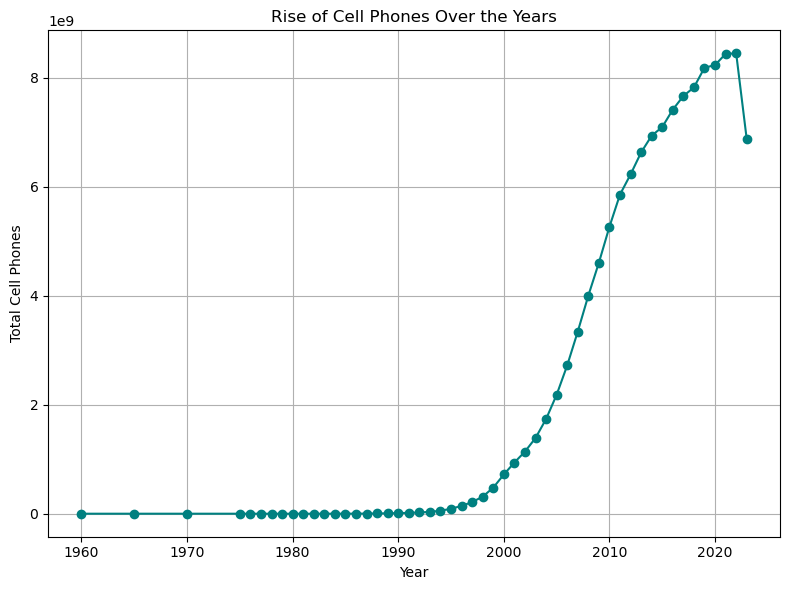

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(cell_phones_by_year.index, cell_phones_by_year.values, marker='o', color='teal')
plt.title('Rise of Cell Phones Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Cell Phones')
plt.grid(True)
plt.tight_layout()
plt.show()